# Leia o arquivo e inspecione os dados

In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd

In [2]:
# Importando dados
df = pd.read_csv('Data.csv', delimiter=',')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom


In [3]:
# Limpando espaços em brancos do DataFrame
df.columns = [col.strip() for col in df.columns]
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df = df.applymap(lambda x: np.nan if x == '' else x)

In [4]:
# Análisando colunas númericas com describe
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611121,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Valores faltantes na identificação do cliente

In [6]:
# Valores faltantes na identificação do cliente
df['CustomerID'].isna().sum()

135080

In [7]:
# Apagando linhas de clientes NaN
df.dropna(subset=['CustomerID'], inplace=True)

# Preços unitários e quantidade de produtos iguais ou inferior a 0

In [8]:
# Verificando a existência de Preços unitários e Quantidades iguais ou abaixo de 0
df.query('UnitPrice <= 0 or Quantity <= 0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [9]:
# Filtrando DataFrame para utilizar apenas os Preços unitários e Quantidades acima de 0
df.query('UnitPrice > 0 and Quantity > 0', inplace=True)

# Verifique se existem linhas duplicadas

In [10]:
# Verificando linhas duplicadas
df.duplicated().sum()

5192

In [11]:
# Retirando linhas duplicadas
df.drop_duplicates(inplace=True)

# Tipos de dados da coluna

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom


In [14]:
# Alterando o InvoiceDate para tipo datetime64[ns]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

In [15]:
# Alterando o CustomerID para o tipo int64
df['CustomerID'] = df['CustomerID'].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


# Tratando os outliers

In [17]:
# Importando o scale da sub-modulo preprocessing da biblioteca scikit-learn
from sklearn.preprocessing import scale

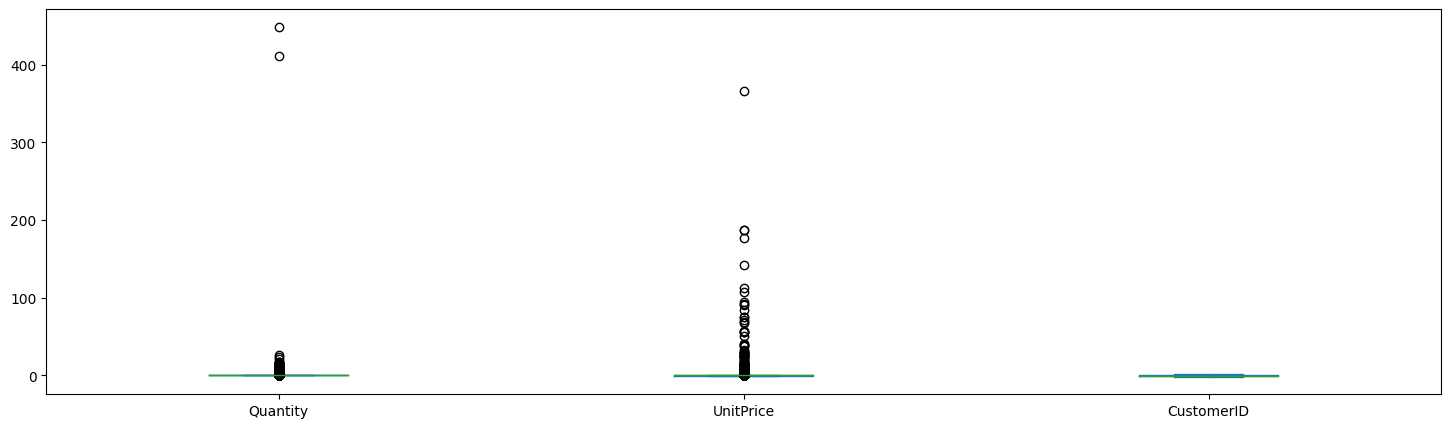

In [18]:
# Plotando visualização dos outilers
numeric_cols = df.select_dtypes('number').columns

df[numeric_cols].apply(scale).plot.box(figsize=(18, 5));

In [19]:
# Removendo os outilers do Dataframe
df.query('Quantity <= 10000 and UnitPrice <= 5000', inplace=True)

# Crie uma coluna adicional

In [20]:
# Criando uma coluna de Preço Total
df['TotalPrice'] =  df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


# Última data

In [21]:
# Verificando a ultima data de venda
end_date = df['InvoiceDate'].max()
end_date

Timestamp('2011-12-09 12:50:00')

# Plotando gráficos

In [22]:
# Importando a biblioteca matplotlib
import matplotlib.pyplot as plt

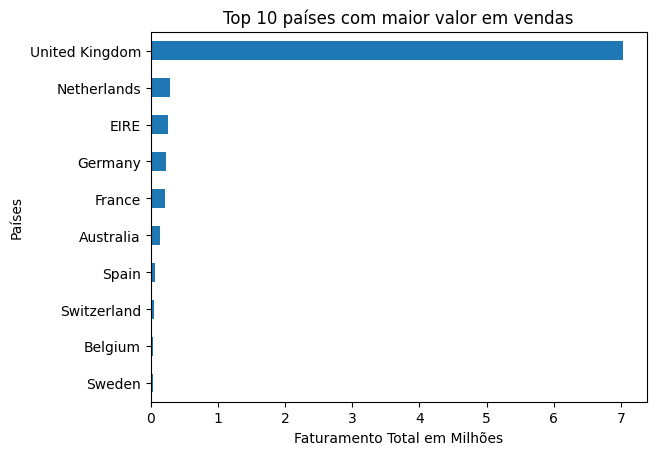

In [23]:
# Top 10 países com maior valor em vendas
paises_maior_vendas = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).nlargest(10) / 1000000

paises_maior_vendas.plot.barh()
plt.title('Top 10 países com maior valor em vendas')
plt.ylabel('Países')
plt.xlabel('Faturamento Total em Milhões')
plt.gca().invert_yaxis()
plt.show()

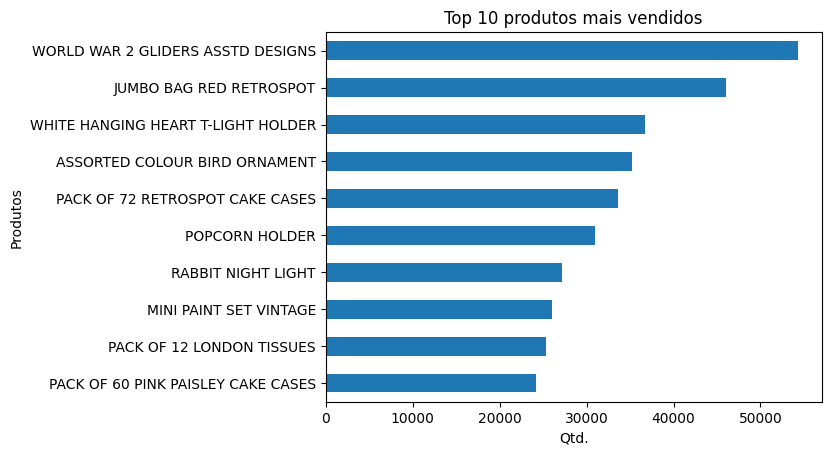

In [24]:
# Top 10 produtos mais vendidos
produtos_mais_vendas = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).nlargest(10)

produtos_mais_vendas.plot.barh()
plt.title('Top 10 produtos mais vendidos')
plt.ylabel('Produtos')
plt.xlabel('Qtd.')
plt.gca().invert_yaxis()
plt.show()

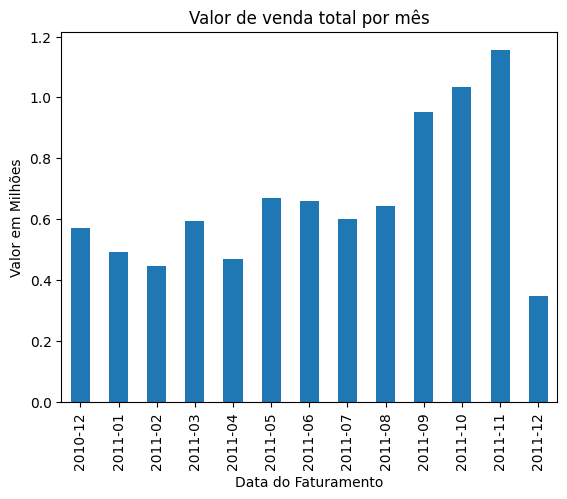

In [25]:
# Valor de venda total por mês
valor_mes = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalPrice'].sum() / 1000000

valor_mes.plot.bar()
plt.title('Valor de venda total por mês')
plt.ylabel('Valor em Milhões')
plt.xlabel('Data do Faturamento')
plt.show()

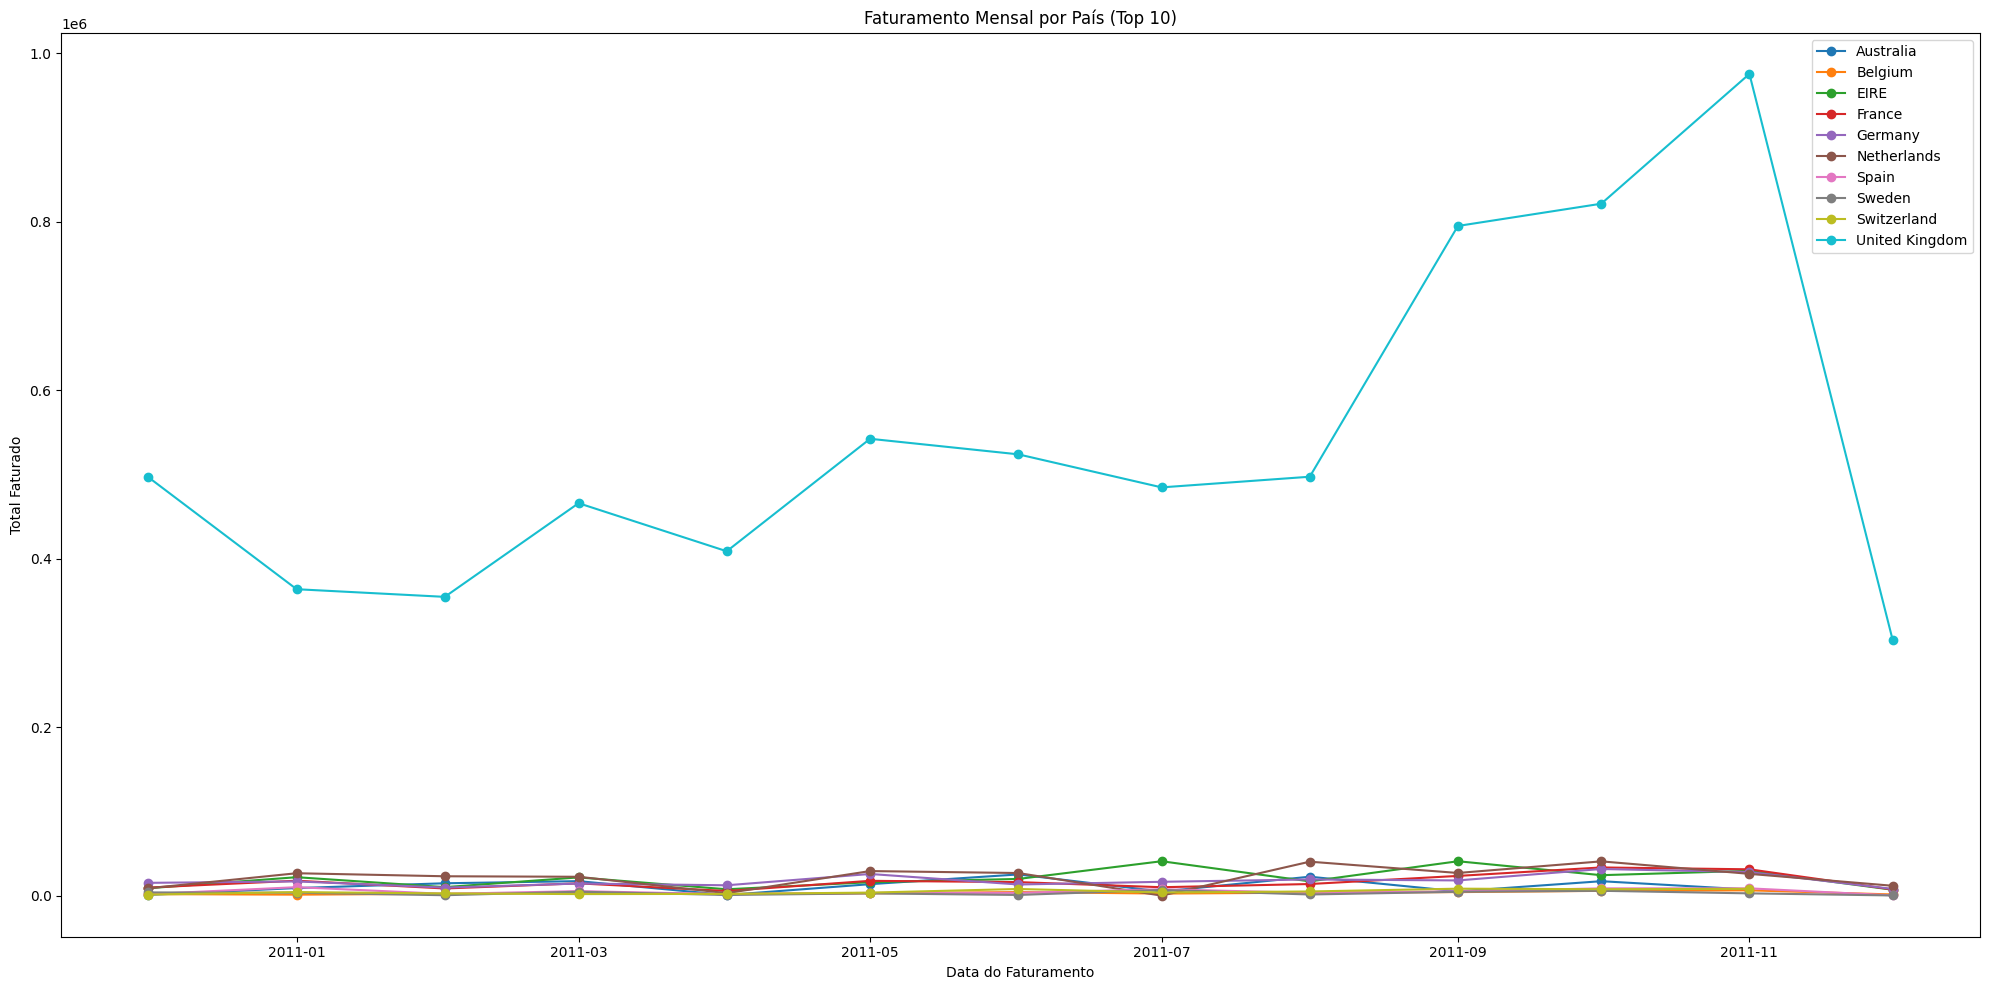

In [26]:
# Valor de venda total por mês e por país (considere apenas os top 10)
valor_pais_mes = df.groupby(['Country', df['InvoiceDate'].dt.to_period('M')])['TotalPrice'].sum().reset_index()

valor_pais_mes.query(f'Country in {list(paises_maior_vendas.reset_index()["Country"])}', inplace=True)

valor_pais_mes['InvoiceDate'] = valor_pais_mes['InvoiceDate'].dt.to_timestamp()

plt.figure(figsize=(20, 10))

for country, data in valor_pais_mes.groupby('Country'):
    plt.plot(data['InvoiceDate'], data['TotalPrice'], marker='o', linestyle='-', label=country)

plt.title('Faturamento Mensal por País (Top 10)')
plt.xlabel('Data do Faturamento')
plt.ylabel('Total Faturado')
plt.legend()
plt.tight_layout()
plt.show()

# Cálculo do RFM

In [27]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [28]:
# Função que calcula o RFM
def RFM(df, end_date):
    r = (end_date - df['InvoiceDate'].max()).days
    f = df['InvoiceNo'].count()
    m = df['TotalPrice'].sum() / f

    return pd.Series({
        'InvoiceDate': df['InvoiceDate'].max(),
        'TotalPrice': df['TotalPrice'].sum(),
        'Recência_(dias)': r,
        'Frequência': f,
        'TicketMédio': m
    })

In [29]:
# Agrupando clientes por RFM
cliente_valor = df.groupby(['CustomerID', 'InvoiceNo']).agg({'InvoiceDate': 'max', 'TotalPrice': 'sum'}).reset_index()

cliente_rfm = (
    cliente_valor
    .groupby('CustomerID')
    .apply(lambda df: RFM(df, end_date))
    .reset_index()
)

cliente_rfm

,CustomerID,InvoiceDate,TotalPrice,Recência_(dias),Frequência,TicketMédio
0,12347,2011-12-07 15:52:00,4310.00,1,7,615.714286
1,12348,2011-09-25 13:13:00,1797.24,74,4,449.310000
2,12349,2011-11-21 09:51:00,1757.55,18,1,1757.550000
3,12350,2011-02-02 16:01:00,334.40,309,1,334.400000
4,12352,2011-11-03 14:37:00,2506.04,35,8,313.255000
...,...,...,...,...,...,...
4332,18280,2011-03-07 09:52:00,180.60,277,1,180.600000
4333,18281,2011-06-12 10:53:00,80.82,180,1,80.820000
4334,18282,2011-12-02 11:43:00,178.05,7,2,89.025000
4335,18283,2011-12-06 12:02:00,2045.53,3,16,127.845625
